In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Lattice
The lattice consists in a 1 dimensional array of length `2*L` of node/particles coordinates, build by the function `create_lattice`, whose argument is the lattice size `L`.

The function `dist` computes the distance between a particle and the observer, taking into account periodic boundary conditions. 

Through the function `compute_variance_R` we compute the variance for a given radius R, over a set of $10000$ samples, i.e. different observer locations. 

The final step is the function `get_variance_R`, which collect the variance for each `R` in the given set, and save the results on the output file. 

The maximum radius considered is $R = L/2$, since for larger values we have a windows of observation wider than the lattice itself, and therefore we would count the points twice.

The plots of the results are realised by a Python script.

The constant at which $\frac{\sigma (R)}{R^2}$ converges for $R \to 10^{-1}$ is given by the fact that for small radii we can have 0 or 1 point inside the observation window, whose average will give a constant value.

The oscillations for the fixed-node simulations are generated by the periodicity and uniformity of the lattice, such that increasing radii will not add any particles, while the result will still be scaled with $r^{-2}$.

At large distances the influence of this process is less effective, since the new particles included are a smaller and smaller percentage of the ones already considered, thus making the $\sigma$ converge to a const value.


In [4]:
data10 = np.loadtxt("c++/data/10.csv", delimiter=" ")
data50 = np.loadtxt("c++/data/50.csv", delimiter=" ")
data100 = np.loadtxt("c++/data/100.csv", delimiter=" ")
data200 = np.loadtxt("c++/data/200.csv", delimiter=" ")

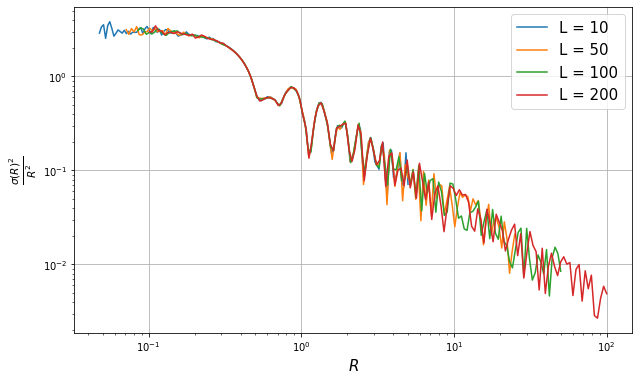

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data10[50:,0], data10[50:,1], label="L = 10")
ax.plot(data50[50:,0], data50[50:,1], label="L = 50")
ax.plot(data100[50:,0], data100[50:,1], label="L = 100")
ax.plot(data200[50:,0], data200[50:,1], label="L = 200")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig("c++/graphs/no_delta.pdf", format="pdf", bbox_inches='tight')

# 2 Shuffled Lattice
The function `AddDisplacement` apply a uniform random displacement in the range $[-\Delta /2, \Delta /2]$ to all particles on the lattice.

We can observe a reduction of the oscillating behaviour, due to the loss of periodicity and uniformity of the shuffled lattice once the particles are moved away from their original nodes. An order of magnitude of $\Delta \approx 1$, i.e. the lattice constant, is sufficient to suppress the oscillations. 

## Results:
### $L=100\;,\;\Delta = 1,2,3,4,5$

In [6]:
data1 = np.loadtxt("c++/data/100delta1.csv", delimiter=" ")
data2 = np.loadtxt("c++/data/100delta2.csv", delimiter=" ")
data3 = np.loadtxt("c++/data/100delta3.csv", delimiter=" ")
data4 = np.loadtxt("c++/data/100delta4.csv", delimiter=" ")
data5 = np.loadtxt("c++/data/100delta5.csv", delimiter=" ")

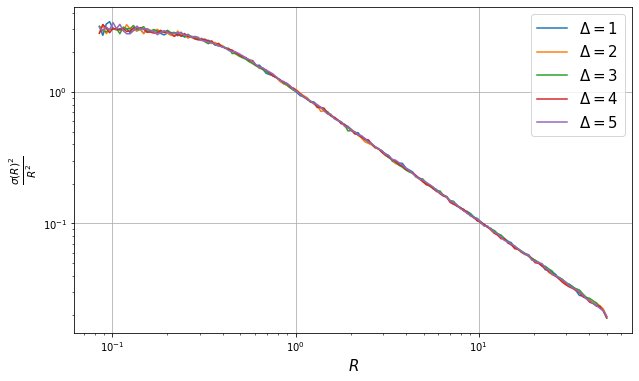

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data1[50:,0], data1[50:,1], label=r"$\Delta = 1$")
ax.plot(data2[50:,0], data2[50:,1], label=r"$\Delta = 2$")
ax.plot(data3[50:,0], data3[50:,1], label=r"$\Delta = 3$")
ax.plot(data4[50:,0], data4[50:,1], label=r"$\Delta = 4$")
ax.plot(data5[50:,0], data5[50:,1], label=r"$\Delta = 5$")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig("c++/graphs/varying_delta_L_100.pdf", format="pdf", bbox_inches='tight')

### $L = 50,100,200\;,\;\Delta = 2$

In [8]:
data50_2 = np.loadtxt("c++/data/50deltafix2.csv", delimiter=" ")
data100_2 = np.loadtxt("c++/data/100deltafix2.csv", delimiter=" ")
data200_2 = np.loadtxt("c++/data/200deltafix2.csv", delimiter=" ")

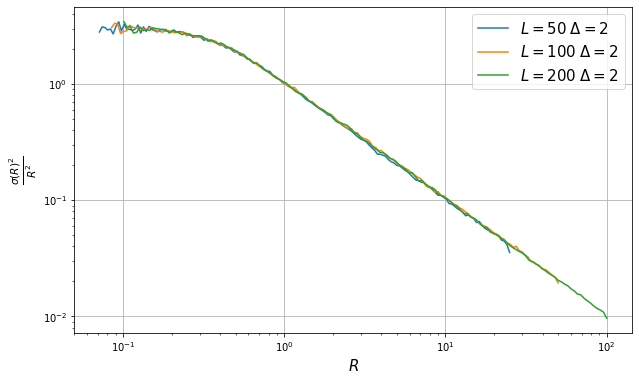

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data50_2[50:,0], data50_2[50:,1], label=r"$L = 50\;\Delta = 2$")
ax.plot(data100_2[50:,0], data100_2[50:,1], label=r"$L = 100\;\Delta = 2$")
ax.plot(data200_2[50:,0], data200_2[50:,1], label=r"$L = 200\;\Delta = 2$")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig("c++/graphs/delta_2_varying_L.pdf", format="pdf", bbox_inches='tight')

## Optimized approach

We also tried an optimized approach, that is not completely correct though, as compared with the suggested procedure. 

Using the functions `GetN_x0` and `GetVarianceOpt` we compute $\sigma$ for a fixed observer $x_{0}$, varying `R` over all radii, and iterating this procedure $10000$ times, for different $x_{0}$.

This way we can optimize the computation time, since we compute all the distances from $x_0$ just once for every $x_{0}$. 

Then, we sort the resulting distances and we compute the observed particles for every `R` using the sorted list.

With this approximation we lose the indipendence of the measures, since the measures at different `R` and equal $x_{0}$ are obviously correlated. The trade off is that the simulation is much faster, but not fully consistent.

Simulations/L | 50 | 100 | 200
--- | --- | --- | ---
Opt | $0.4s$ | $1.6s$ | $7.2s$
Basic | $11.3 s$ | $45.4s$ | $180.2s$


We also report here the result of the optimized simulation for $\Delta = 2$ and $L = 50,100,200$, where we can notice that the approximation is not good for small radius, while it is similar to the basic one for larger values. 

In [11]:
data50_o = np.loadtxt("c++/data/opt50_2.csv", delimiter=" ")
data100_o = np.loadtxt("c++/data/opt100_2.csv", delimiter=" ")
data200_o = np.loadtxt("c++/data/opt200_2.csv", delimiter=" ")

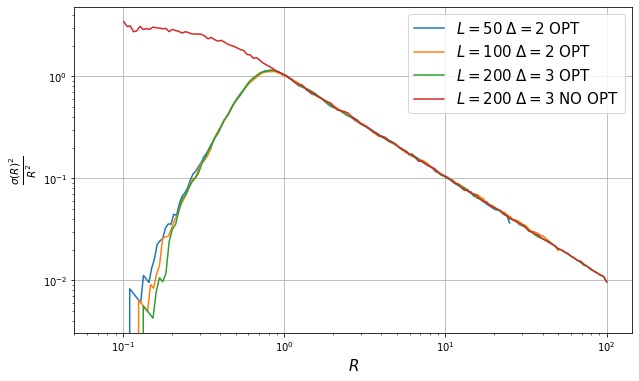

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data50_o[50:,0], data50_o[50:,1], label=r"$L = 50\;\Delta = 2$ OPT")
ax.plot(data100_o[50:,0], data100_o[50:,1], label=r"$L = 100\;\Delta = 2$ OPT")
ax.plot(data200_o[50:,0], data200_o[50:,1], label=r"$L = 200\;\Delta = 3$ OPT")
ax.plot(data200_2[50:,0], data200_2[50:,1], label=r"$L = 200\;\Delta = 3$ NO OPT")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

plt.savefig("c++/graphs/opt_basic_comparison.pdf", format="pdf", bbox_inches='tight')